# 2.2 SUPPORT VECTOR MACHINE (SVM)

## 2.2.1. Ôn tập lý thuyết


## 2.2.2. Bài làm mẫu

### Bài toán 1: Thực hiện các nhiệm vụ trong bài toán 1 để xây dựng mô hình với giải thuật SVM cho dữ liệu
Iris-data lấy từ https://www.kaggle.com/code/xvivancos/tutorial-knn-in-the-iris-data-set 

#### Nhiệm vụ 1: Xây dựng mô hình SVM để phân loại các loài hoa cẩm chướng



1. Tải dữ liệu về, nạp dữ liệu, xem thông tin các feature có trong tập dữ liệu và chuẩn bị dữ liệu cho xây
dựng mô hình

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
# Download&Load dữ liệu iris từ datasets của scikit-learn
iris = datasets.load_iris()
# Hiển thị mô ta dữ liệu, chỉ có trong các bộ dữ liệu chuẩn và mở để học tập và nghiên cứu
print(iris.DESCR)
# Từ tập dữ liệu ban đầu, tách lấy ma trận biểu diễn các đặc trưng và nhãn.
data = iris.data
target = iris.target
# TODO: Chia dữ liệu và nhãn thành 2 tập dữ liệu huấn luyện và dữ liệu kiểm tra theo tỉ lệ 80:20
X_train, X_test, y_train, y_test = train_test_split(data, target,
test_size
 = 0.2, random_state=101)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

2. Tạo mô hình SVM với dữ liệu đã chuẩn bị


In [2]:
from sklearn import svm
# khởi tạo mô hình phân lớp
clf = svm.SVC()
# Sử dụng phương thức 'fit' để huấn luyện mô hình với dữ liệu huấn luyện và nhãn huấn luyện
# fit (X,Y) với X là tập các đối tượng, Y là tập nhãn tương ứng của đối tượng.
clf.fit(X_train, y_train)

SVC()

3. Đánh giá độ chính xác của mô hình 

In [3]:
# Tính độ chính xác trên tập huấn luyện và tập kiểm tra
train_acc = clf.score(X_train,y_train)
val_acc = clf.score(X_test,y_test)
print('Training accuracy: {}'.format(train_acc))
print('Validation accuracy: {}'.format(val_acc))

Training accuracy: 0.95
Validation accuracy: 0.9666666666666667


4. Tìm tham số kernel tối ưu cho mô hình SVM


In [4]:
# best_svm, best_val_acc và best_kernel lần lượt là các biến lưu mô hình tốt nhất, 
# độ chính xác cao nhất trên tập kiểm tra và kernel tốt nhất
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
best_svm = None
best_val_acc = -1
best_kernel = None
# Huấn luyện các mô hình dựa trên dữ liệu huấn luyện và tham số kernel
# Tính toán độ chính xác trên tập huấn luyện và tập kiểm tra để tìm được mô hình tốt nhất
for i in range(4):
    clf = svm.SVC(kernel=kernels[i], probability=True)
    clf.fit(X_train, y_train)
    tmp_val_acc = clf.score(X_test, y_test)
    if (tmp_val_acc > best_val_acc):
        best_val_acc = tmp_val_acc
        best_svm = clf
        best_kernel = kernels[i]
# Hiển thị mô hình tốt nhất cùng với độ chính xác
print("Best validation accuracy : {} with kernel: {}".format(best_val_acc,
best_kernel))
# Mô hình tốt nhất của bạn nên có độ chính xác xấp xỉ 86,67%

Best validation accuracy : 1.0 with kernel: linear


### Bài toán 2: Xây dựng mô hình dựa vào giải thuật SVM trên dữ liệu hình ảnh Handwritten-Digit-MNISTSVM. 

Dữ liệu lấy từ https://www.kaggle.com/code/nishan192/mnist-digit-recognition-using-svm

#### Nhiệm vụ 1: Tìm hiểu về cách biểu diễn và hiển thị các ảnh từ tập dữ liệu là hình ảnh

1. Import thư viện và tải dữ liệu là tập các hình ảnh viết tay từ số 0 đến số 9`

In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits(n_class=10)

2. Khảo sát thông tin có trong digits

In [6]:
#thông tin toàn bộ dữ liệu đã tải về
digits
#xem thông tin của một hình dưới dạng ma trận 8 x 8
digits['data'][0].reshape(8,8)
#xem thông tin của một hình dưới dạng mảng
digits['data'][0]
#xem thông tin 9 nhãn đầu tiên
digits['target'][0:9]


array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [7]:
#xem thông tin của một hình dưới dạng mảng
digits['data'][0]
#xem thông tin 9 nhãn đầu tiên
digits['target'][0:9]


array([0, 1, 2, 3, 4, 5, 6, 7, 8])

3. Vẽ ra hình dựa vào dữ liệu dạng ma trận 8 x 8

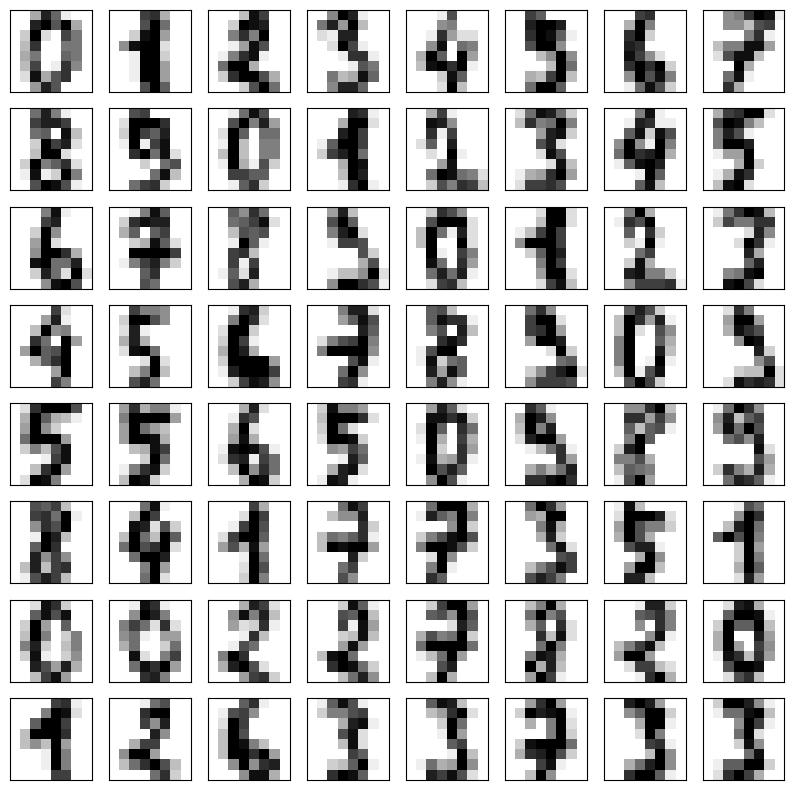

In [8]:
# Each Digit is represented in digits.images as a matrix of 8x8 = 64 pixels. Each of the 64 values represent
# a greyscale. The Greyscale are then plotted in the right scale by the imshow method.
fig, ax = plt.subplots(8,8, figsize=(10,10))
for i, axi in enumerate(ax.flat):
 axi.imshow(digits.images[i], cmap='binary')
 axi.set(xticks=[], yticks=[])


4. Vẽ một ảnh từ ma trận 8 x 8

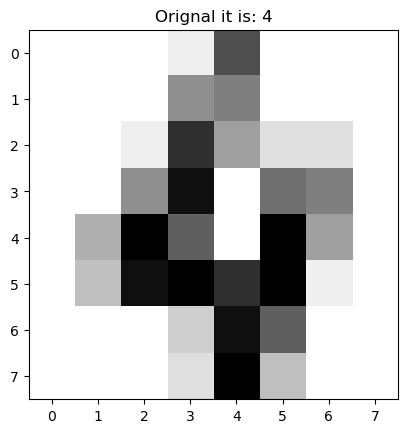

In [9]:
# Hàm vẽ 1 ảnh có kích thước 8 x 8 (ảnh lấy từ ma images)
def view_digit(index):
 plt.imshow(digits.images[index] , cmap = plt.cm.gray_r)
 plt.title('Orignal it is: '+ str(digits.target[index]))
 plt.show()
# vẽ ảnh ở vị trí thứ 4
view_digit(4)

#### Nhiệm vụ 2: Xây dựng mô hình SVM để nhận diện chữ viết tay từ 0 – 9


1. Chuẩn bị dữ liệu và xây dựng mô hình SVM

In [10]:
# Thực hiện import các thư viện cần thiết để xây dựng mô hình SVM
# Thực hiện bước 1 của nhiệm vụ 1
from sklearn import svm
main_data = digits['data']
targets = digits['target']
svc = svm.SVC(gamma=0.001 , C = 100)
# GAMMA is a parameter for non linear hyperplanes.
# The higher the gamma value it tries to exactly fit the training data set
# C is the penalty parameter of the error term.
# It controls the trade off between smooth decision boundary and classifying the training points correctly.
svc.fit(main_data[:1500] , targets[:1500])
predictions = svc.predict(main_data[1501:])
# list(zip(predictions , targets[1501:])

2. Đánh giá hiệu quả của mô hình với Confusion Matrix

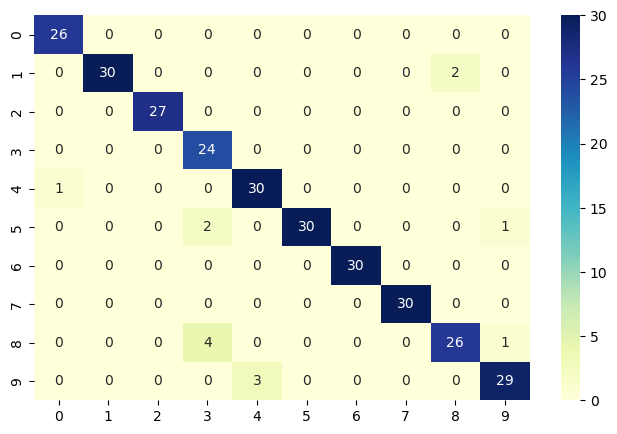

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(predictions, targets[1501:])
conf_matrix = pd.DataFrame(data = cm)
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

3. In kết quả dạng văn bản


In [12]:
from sklearn.metrics import classification_report
print(classification_report(predictions, targets[1501:]))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.94      0.97        32
           2       1.00      1.00      1.00        27
           3       0.80      1.00      0.89        24
           4       0.91      0.97      0.94        31
           5       1.00      0.91      0.95        33
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        30
           8       0.93      0.84      0.88        31
           9       0.94      0.91      0.92        32

    accuracy                           0.95       296
   macro avg       0.95      0.96      0.95       296
weighted avg       0.96      0.95      0.95       296



### 2.2.3. Bài tập thực hành 1


Xây dựng mô hình từ giải thuật SVM trên dữ liệu bệnh tiểu đường. Dữ liệu lấy từ
https://www.kaggle.com/code/tumpanjawat/diabetes-eda-random-forest-hp

Import thư viện

In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns # Để vẽ confusion matrix

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler # <<< QUAN TRỌNG CHO SVM
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures

#### 1. Thông tin về tệp dữ liệu


In [14]:
df = pd.read_csv('Dataset/diabetes_prediction_dataset.csv')
# Hiển thị 5 dòng đầu tiên 
print("5 Dòng đầu tiên (head)")
display(df.head())

# Hiển thị 5 dòng cuối cùng 
print("5 Dòng cuối cùng (tail)")
display(df.tail())

# Hiển thị thông tin tổng quan
print("\nThông tin dữ liệu (info)")
display(df.info())

5 Dòng đầu tiên (head)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


5 Dòng cuối cùng (tail)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0



Thông tin dữ liệu (info)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


None

**Giới thiệu cột dữ liệu**

| Cột | Kiểu dữ liệu  | Ý nghĩa |
|-----|---------------|---------|
| `gender` | `object ` | Giới tính của bệnh nhân (Male/Female) |
| `age` | `float` | Tuổi của bệnh nhân (năm) |
| `hypertension` | `int`  | Có bị cao huyết áp hay không (1 = Có, 0 = Không) |
| `heart_disease` | `int`  | Có bệnh tim mạch hay không (1 = Có, 0 = Không) |
| `smoking_history` | `object` | Tiền sử hút thuốc (ví dụ: never, current, former, No Info…) |
| `bmi` | `float` | Chỉ số khối cơ thể BMI (Body Mass Index) |
| `HbA1c_level` | `float` | Mức HbA1c (%) – chỉ số đường huyết trung bình 2–3 tháng |
| `blood_glucose_level` | `int` | Mức đường huyết hiện tại (mg/dL hoặc mmol/L tùy dataset) |
| `diabetes` | `int` | Nhãn phân loại: bệnh nhân có tiểu đường hay không 1/0  |


**Mô tả tệp dữ liệu**

| Giới tính | Tuổi | Cao huyết áp | Bệnh tim mạch | Tiền sử hút thuốc | BMI  | HbA1c (%) | Đường huyết | Tiểu đường |
|-----------|------|--------------|---------------|------------------|------|-----------|-------------|------------|
| Nữ        | 80   | Không (0)    | Có (1)        | Chưa từng        | 25.19 | 6.6       | 140         | Không (0) |
| Nữ        | 54   | Không (0)    | Không (0)     | Không có thông tin | 27.32 | 6.6     | 80          | Không (0) |
| Nam       | 28   | Không (0)    | Không (0)     | Chưa từng        | 27.32 | 5.7       | 158         | Không (0) |
| Nữ        | 36   | Không (0)    | Không (0)     | Hiện tại         | 23.45 | 5.0       | 155         | Không (0) |
| Nam       | 76   | Có (1)       | Có (1)        | Hiện tại         | 20.14 | 4.8       | 155         | Không (0) |


#### 2. Tiền xử lý dữ liệu

In [15]:
df = pd.read_csv('Dataset/diabetes_prediction_dataset.csv')

# Loại bỏ 18 giá trị 'Other' để đơn giản hóa
df = df[df['gender'] != 'Other']

#Chuyển đổi dữ liệu (Categorical -> Numerical) ---
# Dùng One-Hot Encoding cho các cột chữ
df = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)

print("Dữ liệu sau khi đã tiền xử lý")
display(df.head())

Dữ liệu sau khi đã tiền xử lý


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,0,False,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,True,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,True,True,False,False,False,False


Lựa chọn đặc trưng (Features)

In [16]:
# Cột mục tiêu
target = 'diabetes'

# Lấy tất cả các cột khác làm đặc trưng (features)
features_list = df.columns.drop(target).tolist()

print(f"Trích xuất đặc trưng: {features_list}")

Trích xuất đặc trưng: ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'gender_Male', 'smoking_history_current', 'smoking_history_ever', 'smoking_history_former', 'smoking_history_never', 'smoking_history_not current']


Chia dữ liệu (Train/Test)

Tách dữ liệu thành 2 tập: huấn luyện (80%) và kiểm tra (20%).

In [17]:
# Lấy giá trị X (đặc trưng) và y (mục tiêu)
X = df[features_list].values
y = df[target].values

# Sử dụng train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=24)

print(f"Kích thước tập Train: {X_train.shape}")
print(f"Kích thước tập Test: {X_test.shape}")

Kích thước tập Train: (79985, 12)
Kích thước tập Test: (19997, 12)


Chuẩn hoá dữ liệu

In [18]:
# 1. Khởi tạo Scaler
scaler = StandardScaler()

# 2. Fit scaler CHỈ trên X_train (học trung bình và độ lệch chuẩn của tập train)
X_train_scaled = scaler.fit_transform(X_train)

# 3. Transform X_test (áp dụng các thông số đã học từ X_train)
X_test_scaled = scaler.transform(X_test)

print("\nĐã hoàn tất chuẩn hóa dữ liệu.")
print(f"Giá trị trung bình của X_train_scaled (gần bằng 0): {X_train_scaled.mean():.2f}")
print(f"Độ lệch chuẩn của X_train_scaled (gần bằng 1): {X_train_scaled.std():.2f}")


Đã hoàn tất chuẩn hóa dữ liệu.
Giá trị trung bình của X_train_scaled (gần bằng 0): 0.00
Độ lệch chuẩn của X_train_scaled (gần bằng 1): 1.00


#### 3. Xây dựng mô hình SVM

**Mô hình SVM cơ bản**

In [19]:
# Tạo mô hình SVM với dữ liệu đã chuẩn bị
svm_model_base = SVC(kernel='rbf', random_state=42)

# Huấn luyện mô hình với dữ liệu ĐÃ CHUẨN HÓA
print("Đang huấn luyện mô hình SVM cơ bản...")
svm_model_base.fit(X_train_scaled, y_train)
print("Hoàn thành!")

# Đánh giá độ chính xác của mô hình
# .score() trả về 'accuracy'
train_acc = svm_model_base.score(X_train_scaled, y_train)
test_acc = svm_model_base.score(X_test_scaled, y_test)

print(f"Độ chính xác trên tập Train: {train_acc * 100:.2f}%")
print(f"Độ chính xác trên tập Test: {test_acc * 100:.2f}%")

Đang huấn luyện mô hình SVM cơ bản...
Hoàn thành!
Độ chính xác trên tập Train: 96.35%
Độ chính xác trên tập Test: 96.42%


**Tối ưu hoá tham số SVM  với GridSearchCV**

Lưới Tham số (Parameter Grid) 

Chúng ta sẽ thử 2 kernel chính: 'linear' (không cần 'gamma') và 'rbf' (cần 'gamma'). Chúng ta sẽ thử các giá trị cho 'C' (tham số phạt - từ lý thuyết Lề mềm).

In [20]:
# GridSearchCV sẽ thử tất cả các tổ hợp này

param_grid = [
    # Tùy chọn 1: Thử kernel 'linear' với các giá trị C khác nhau
    {
        'kernel': ['linear'], 
        'C': [0.1, 1, 10] 
        # C nhỏ: lề rộng, C lớn: lề hẹp
    },
    
    # Tùy chọn 2: Thử kernel 'rbf' với các giá trị C và gamma khác nhau
    {
        'kernel': ['rbf'], 
        'C': [0.1, 1, 10], 
        'gamma': ['scale', 0.001] 
        # 'scale' là giá trị mặc định tốt, 0.001 là giá trị như trong ví dụ MNIST
    }
]

# Khởi tạo mô hình SVM cơ sở
svm_base = SVC(random_state=42)

# Khởi tạo GridSearchCV
# cv=3: 3-fold cross-validation (dùng 3-fold thay vì 4 cho nhanh hơn vì SVM chậm)
# scoring='roc_auc': Dùng ROC AUC để đánh giá, tốt hơn 'accuracy' cho dữ liệu mất cân bằng.
# verbose=2: In ra tiến trình
# n_jobs=-1: Dùng tất cả các nhân CPU
grid_svm = GridSearchCV(svm_base, 
                        param_grid, 
                        cv=3, 
                        scoring='roc_auc', 
                        verbose=2, 
                        n_jobs=-1)

print("Bắt đầu tìm tham số tối ưu cho SVM (GridSearchCV)")

Bắt đầu tìm tham số tối ưu cho SVM (GridSearchCV)


**Huấn luyện mô hình GridSearchCV**

In [21]:
# Huấn luyện trên dữ liệu đã chuẩn hóa
grid_svm.fit(X_train_scaled, y_train)
print("Hoàn thành!")

# In ra các tham số 
print(f"Các tham số  tìm được: {grid_svm.best_params_}")
print(f"Điểm ROC AUC  (trên tập Val): {grid_svm.best_score_:.4f}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Hoàn thành!
Các tham số  tìm được: {'C': 0.1, 'kernel': 'linear'}
Điểm ROC AUC  (trên tập Val): 0.9600


#### 4. Đánh giá mô hình

**Đánh giá mô hình SVM tốt nhất**

Lấy mô hình tôt nhất để dự đoán

In [22]:
# Lấy ra mô hình tốt nhất
best_svm_model = grid_svm.best_estimator_

# Dự đoán trên tập Test (đã chuẩn hóa)
y_pred = best_svm_model.predict(X_test_scaled)

**Đánh giá hiệu quả với Classification Report**

In [23]:
# In kết quả dạng văn bản (như MNIST)
print("\n--- Classification Report (Báo cáo Phân loại) ---")
# So sánh y_test (thực tế) và y_pred (dự đoán)
print(classification_report(y_test, y_pred, target_names=['Not Diabetic (0)', 'Diabetic (1)']))


--- Classification Report (Báo cáo Phân loại) ---
                  precision    recall  f1-score   support

Not Diabetic (0)       0.96      1.00      0.98     18328
    Diabetic (1)       0.92      0.59      0.72      1669

        accuracy                           0.96     19997
       macro avg       0.94      0.79      0.85     19997
    weighted avg       0.96      0.96      0.96     19997



**Ma trận nhần lẫn**

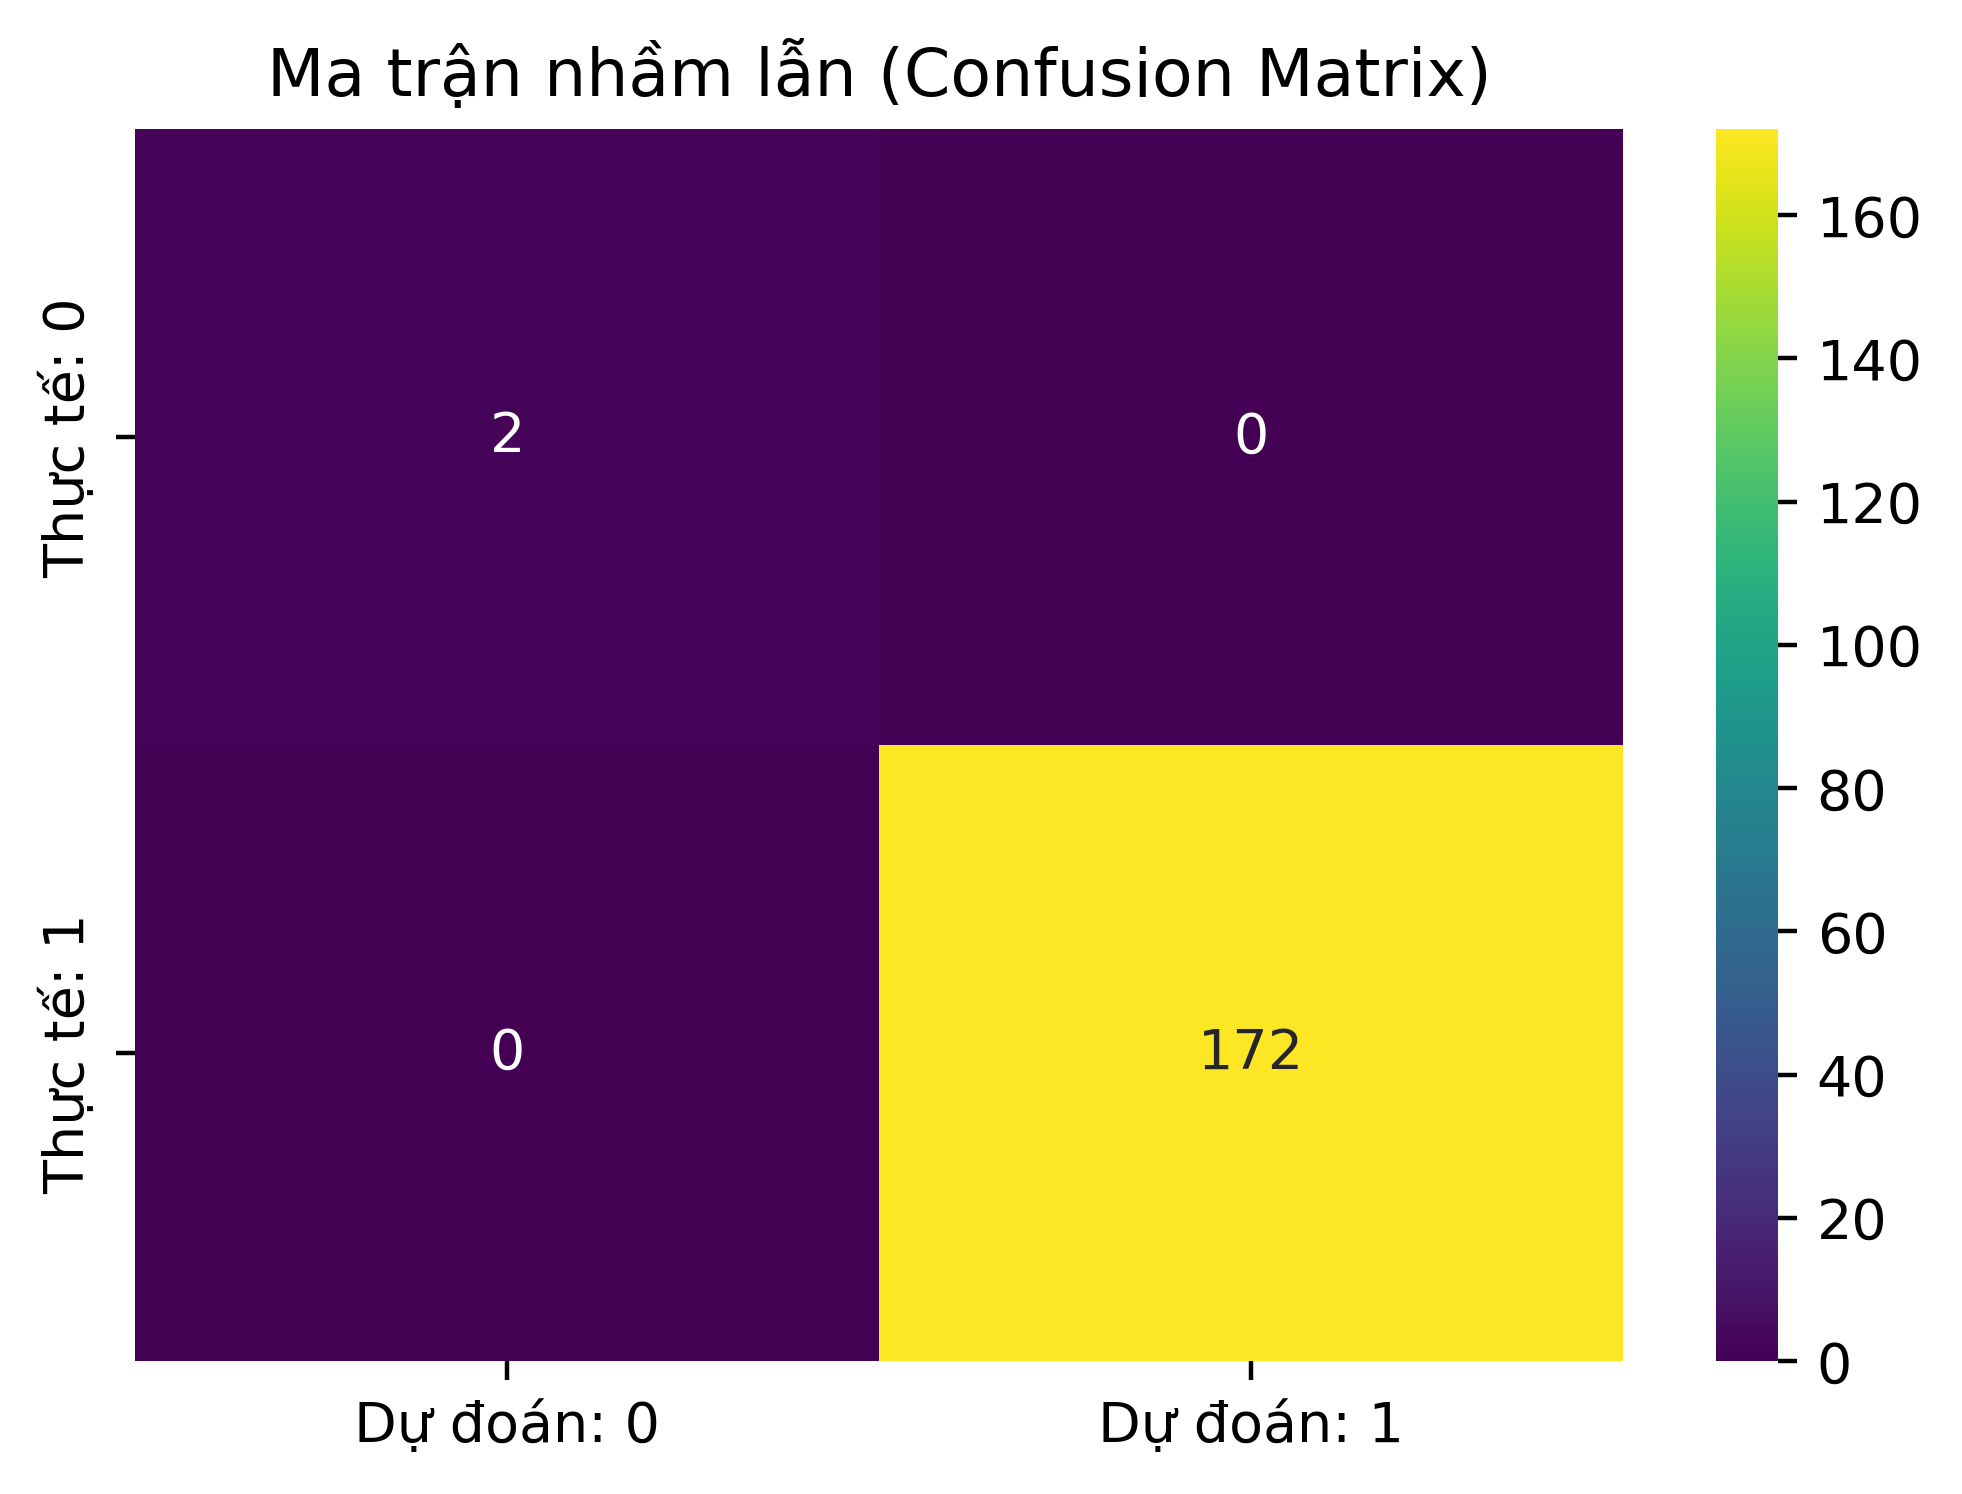

In [40]:
# Tạo Confusion Matrix (như MNIST)
cm = confusion_matrix(y_test, y_pred)

# Vẽ ma trận dưới dạng heatmap
plt.figure(figsize = (6,4))
sns.heatmap(cm, 
            annot=True, # Hiển thị số lượng
            fmt='d',    # Định dạng số nguyên
            cmap="viridis", # Bảng màu
            xticklabels=['Dự đoán: 0', 'Dự đoán: 1'],
            yticklabels=['Thực tế: 0', 'Thực tế: 1'])
plt.title('Ma trận nhầm lẫn (Confusion Matrix)')
plt.show()

**Phân tích:**

1. Phân tích Lớp Thiểu số (Lớp 1: "Diabetic - Có Bệnh Tiểu Đường")

   - True Positives (TP) = 986: Trong tập test có 1,669 ca “Có bệnh tiểu đường”, mô hình đã dự đoán đúng 986 ca.

    - False Negatives (FN) = 683: Mô hình bỏ sót 683 ca thật sự bị tiểu đường, tức là đã dự đoán nhầm chúng thành “Không bệnh”.

    - Recall (Độ phủ) Lớp 1: $986 / (986 + 683) = 59\%$. Mô hình chỉ phát hiện được 59% số ca bệnh thực sự, cho thấy độ nhạy còn thấp.

2. Phân tích Lớp Đa số (Lớp 0: "Not Diabetic - Không Bị Tiểu Đường")

    - True Negatives (TN) = 18,241: Trong tập test có 18,328 ca “Không bệnh”, mô hình đã dự đoán đúng 18,241 ca.

    - False Positives (FP) = 87: Mô hình báo nhầm 87 người khỏe mạnh là “Có bệnh”, nhưng tỷ lệ này rất thấp.

    - Recall (Độ phủ) Lớp 0: $18,241 / (18,241 + 87) = 99.5\% \approx 100\%$. Mô hình gần như hoàn hảo trong việc nhận diện người không bị tiểu đường.

### 2.2.4. Bài tập thực hành 2

Xây dựng mô hình từ giải thuật SVM trên dữ liệu các con thú trong rừng. Dữ liệu lấy từ
https://www.kaggle.com/code/kareemellithy/animal-condition-predict-svm-knn

#### 1. Thông tin về dữ liệu


In [25]:
df_raw = pd.read_csv('Dataset/data.csv') 

# Hiển thị 5 dòng đầu tiên 
print("5 Dòng đầu tiên (head)")
display(df_raw.head())

# Hiển thị 5 dòng cuối cùng 
print("5 Dòng cuối cùng (tail)")
display(df_raw.tail())

# Hiển thị thông tin tổng quan
print("\nThông tin dữ liệu (info)")
display(df_raw.info())

5 Dòng đầu tiên (head)


,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
0,Dog,Fever,Diarrhea,Vomiting,Weight loss,Dehydration,Yes
1,Dog,Fever,Diarrhea,Coughing,Tiredness,Pains,Yes
2,Dog,Fever,Diarrhea,Coughing,Vomiting,Anorexia,Yes
3,Dog,Fever,Difficulty breathing,Coughing,Lethargy,Sneezing,Yes
4,Dog,Fever,Diarrhea,Coughing,Lethargy,Blue Eye,Yes


5 Dòng cuối cùng (tail)


,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
866,Buffaloes,Fever,Difficulty breathing,Poor Appetite,Eye and Skin change,Unable to exercise,Yes
867,Buffaloes,Fever,Loss of appetite,Lession on the skin,Lethargy,Joint Pain,Yes
868,Buffaloes,Lesions in the nasal cavity,Lesions on nose,Vomiting,Noisy Breathing,Lesions on nose,Yes
869,Buffaloes,Hair loss,Dandruff,Vomiting,Crusting of the skin,Ulcerated skin,Yes
870,Buffaloes,Greenish-yellow nasal discharge,Lack of pigmentation,Vomiting,Lethargy,Pain on face,Yes



Thông tin dữ liệu (info)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   AnimalName  871 non-null    object
 1   symptoms1   871 non-null    object
 2   symptoms2   871 non-null    object
 3   symptoms3   871 non-null    object
 4   symptoms4   871 non-null    object
 5   symptoms5   871 non-null    object
 6   Dangerous   869 non-null    object
dtypes: object(7)
memory usage: 47.8+ KB


None

**Nhận xét:**

Tất cả 7 cột đều có kiểu ***object*** (chuỗi ký tự). 

Các thuật toán toán học như SVM không thể làm việc trực tiếp. 

Phải mã hóa (encode) toàn bộ dữ liệu này sang dạng số.

**Giới thiệu cột dữ liệu**
| Cột | Kiểu dữ liệu | Ý nghĩa |
|-----|--------------|---------|
| `AnimalName` | `object` | Tên con vật (ví dụ: Dog, Cat…) |
| `symptoms1` → `symptoms5` | `object` | 5 triệu chứng của con vật (có thể là bệnh lý hoặc dấu hiệu cơ thể) |
| `Dangerous` | `object` (`Yes`/`No`) | Cho biết con vật có nguy hiểm hay không (Yes = nguy hiểm, No = không nguy hiểm) |


**Mô tả tệp dữ liệu**

| Tên động vật | Triệu chứng 1 | Triệu chứng 2          | Triệu chứng 3 | Triệu chứng 4   | Triệu chứng 5 | Nguy hiểm |
|--------------|---------------|----------------------|---------------|----------------|---------------|-----------|
| Chó          | Sốt            | Tiêu chảy             | Nôn mửa       | Sụt cân        | Mất nước      | Có        |
| Chó          | Sốt            | Tiêu chảy             | Ho            | Mệt mỏi        | Đau nhức      | Có        |
| Chó          | Sốt            | Tiêu chảy             | Ho            | Nôn mửa        | Chán ăn       | Có        |
| Chó          | Sốt            | Khó thở               | Ho            | Uể oải         | Hắt hơi       | Có        |
| Chó          | Sốt            | Tiêu chảy             | Ho            | Uể oải         | Mắt xanh      | Có        |


#### 2. Tiền xử lý dữ liệu

**Chuẩn hoá dữ liệu**
Kiểm tra xem nó có nhất quán hay không

Ví dụ: Fever và fever 

In [26]:
# Kiểm tra cột 'symptoms1'
print("\n--- Kiểm tra 'symptoms1' (phân biệt hoa/thường) ---")
print(df_raw['symptoms1'].value_counts().head(10)) 

# Kiểm tra cột 'symptoms5'
print("\n--- Kiểm tra 'symptoms5' (phân biệt số ít/nhiều) ---")
print(df_raw['symptoms5'].value_counts().head(10))


--- Kiểm tra 'symptoms1' (phân biệt hoa/thường) ---
symptoms1
Fever                      257
Fetopelvic dispropotion     21
wasting                     20
fever                       14
loss of appetite            12
Swelling                     9
Emaciation                   8
Jaundice                     8
sudden death                 8
Dyspnea                      8
Name: count, dtype: int64

--- Kiểm tra 'symptoms5' (phân biệt số ít/nhiều) ---
symptoms5
Pains              99
Pain               68
Anorexia           37
Nasal Discharge    37
Weight loss        24
Anemia             19
Weakness           18
Death              15
depression         14
Dehydration        14
Name: count, dtype: int64


**Nhận xét:**

Cột `symptoms1` chứa cả 'Fever' (viết hoa, 257 lần) và 'fever' (viết thường, 14 lần).

Cột `symptoms5` chứa cả 'Pains' (số nhiều, 99 lần) và 'Pain' (số ít, 68 lần).

Chúng ta cần chuẩn hóa chúng trước khi mã hóa vì máy sẽ nghĩ 4 giá trị hoàn toàn khác nhau.

Kiểm tra giá trị thiếu (Missing Values) 

*Xem chính xác số lượng giá trị rỗng (NaN) trong mỗi cột.*

In [27]:
# Đếm số lượng giá trị thiếu (NaN) trên cột
print("\n--- Kiểm tra giá trị thiếu (NaN) ---")
print(df_raw.isnull().sum())


--- Kiểm tra giá trị thiếu (NaN) ---
AnimalName    0
symptoms1     0
symptoms2     0
symptoms3     0
symptoms4     0
symptoms5     0
Dangerous     2
dtype: int64


**Nhận xét:**

Kết quả `df_raw.info()` cho thấy `Dangerous` có 869 giá trị `non-null` trong khi các cột khác có 871.

Cột `Dangerous` có 2 giá trị thiếu (NaN).

Cột `Dangerous` chính là biến mục tiêu (target) mà chúng ta muốn dự đoán.

→ **Giải pháp**: Vì số lượng thiếu chỉ là 2 (rất nhỏ so với 871), cách xử lý đơn giản và hợp lý nhất là loại bỏ 2 dòng này.

Kiểm tra biến mục tiêu

In [28]:
# Kiểm tra sự phân bổ của cột 'Dangerous'
print("Kiểm tra sự mất cân bằng của cột 'Dangerous'")
print("Số lượng mẫu (Count):")

# dropna=False để hiển thị cả các giá trị NaN (nếu có)
print(df_raw['Dangerous'].value_counts(dropna=False))

print("\nTỷ lệ phần trăm (Percentage):")
# normalize=True sẽ tính tỷ lệ phần trăm
print(df_raw['Dangerous'].value_counts(normalize=True) * 100)

Kiểm tra sự mất cân bằng của cột 'Dangerous'
Số lượng mẫu (Count):
Dangerous
Yes    849
No      20
NaN      2
Name: count, dtype: int64

Tỷ lệ phần trăm (Percentage):
Dangerous
Yes    97.698504
No      2.301496
Name: proportion, dtype: float64


**Nhận xét:**

- Kết quả cho thấy dữ liệu bị mất cân bằng cực kỳ nghiêm trọng.  

    - Lớp 'Yes' (đa số) chiếm tới 849 mẫu (khoảng 97.7%).  
    
    - Lớp 'No' (thiểu số) chỉ có 20 mẫu (khoảng 2.3%).  

Làm sạch dữ liệu

In [29]:
# Tải dữ liệu
df = pd.read_csv('Dataset/data.csv')

# --- Xử lý giá trị thiếu (NaN) ---
# Loại bỏ 2 dòng thiếu DL
df = df.dropna(subset=['Dangerous'])

# --- Chuẩn hóa dữ liệu chữ ---
# Đưa tất cả về chữ thường và loại bỏ khoảng trắng thừa
for col in df.columns:
    df[col] = df[col].str.lower().str.strip()

# Chuẩn hóa các giá trị không nhất quán 
df['symptoms5'] = df['symptoms5'].replace('pains', 'pain')

# --- Mã hóa Biến Mục tiêu (Target Encoding)
# Chuyển 'Dangerous' ('yes'/'no') thành số (1/0)
df['Dangerous'] = df['Dangerous'].map({'yes': 1, 'no': 0})

print("Dữ liệu sau khi làm sạch và mã hóa mục tiêu:")
print(df['Dangerous'].value_counts())
print("\nThông tin dữ liệu sau khi làm sạch:")
df.info()

Dữ liệu sau khi làm sạch và mã hóa mục tiêu:
Dangerous
1    849
0     20
Name: count, dtype: int64

Thông tin dữ liệu sau khi làm sạch:
<class 'pandas.core.frame.DataFrame'>
Index: 869 entries, 0 to 870
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   AnimalName  869 non-null    object
 1   symptoms1   869 non-null    object
 2   symptoms2   869 non-null    object
 3   symptoms3   869 non-null    object
 4   symptoms4   869 non-null    object
 5   symptoms5   869 non-null    object
 6   Dangerous   869 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 54.3+ KB


**Nhận xét:**

Loại bỏ 2 dòng bị thiếu dữ liệu mục tiêu, còn lại 869 dòng.

Chuẩn hóa tất cả dữ liệu về chữ thường (ví dụ: 'Fever' và 'fever' giờ là một).

Mã hóa cột mục tiêu 'Dangerous' thành 1 (yes) và 0 (no).

Mã hóa đặc trưng (Feature Encoding)

Các cột đặc trưng ('AnimalName', 'symptoms1'...) vẫn đang là chữ.  Biến chúng thành các cột 0/1. Dùng ***'pd.get_dummies'*** 

In [30]:
# Lấy danh sách các cột đặc trưng (tất cả trừ cột 'Dangerous')
features_list = df.columns.drop('Dangerous').tolist()

print(f"Các đặc trưng sẽ được mã hóa: {features_list}")

# Sử dụng pd.get_dummies để chuyển đổi các cột đặc trưng
df_processed = pd.get_dummies(df, columns=features_list, drop_first=True)

print("\nKích thước dữ liệu:")
print(df_processed.shape)

Các đặc trưng sẽ được mã hóa: ['AnimalName', 'symptoms1', 'symptoms2', 'symptoms3', 'symptoms4', 'symptoms5']



Kích thước dữ liệu:
(869, 1105)


**Nhận xét:**

Dữ liệu gốc chỉ có 6 đặc trưng, nhưng sau khi mã hóa, số lượng đặc trưng đã tăng lên rất nhiều (thấy ở `df_processed.shape`). Đây là một bộ dữ liệu "rộng" và "thưa" (sparse).

Chia dữ liệu (Train/Test Split) 

*Tách dữ liệu thành 2 tập: huấn luyện và kiểm tra.*

In [31]:
# Cột mục tiêu
target = 'Dangerous'

# X là tất cả các cột đã mã hóa (trừ cột mục tiêu)
X = df_processed.drop(target, axis=1).values
y = df_processed[target].values

# Chia dữ liệu
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Kích thước tập Train: {X_train.shape}")
print(f"Kích thước tập Test: {X_test.shape}")

Kích thước tập Train: (695, 1104)
Kích thước tập Test: (174, 1104)


Chuẩn hóa dữ liệu (Feature Scaling) 

In [32]:
# Khởi tạo Scaler
scaler = StandardScaler()

# Fit scaler trên X_train
X_train_scaled = scaler.fit_transform(X_train)

# Transform X_test
X_test_scaled = scaler.transform(X_test)

print("\nĐã hoàn tất chuẩn hóa dữ liệu.")


Đã hoàn tất chuẩn hóa dữ liệu.


#### 3. Xây dựng mô hình SVM

**Xây dựng SVM với xử lý mất cân bằng**

Nếu train SVM bình thường, nó sẽ ưu tiên dự đoán lớp nhiều hơn, dẫn đến mất khả năng nhận dạng lớp ít.

Do dữ liệu mất cân bằng nghiêm trọng (849 vs 20), nếu huấn luyện bình thường, mô hình sẽ phớt lờ lớp 'No' (0). 

Chúng ta sử dụng tham số class_weight='balanced' (SVM sẽ tự động cân bằng trọng số giữa các lớp) để lớp ít dữ liệu sẽ được “đặt trọng số lớn hơn” để mô hình chú ý nhiều hơn.


In [33]:
# Tạo mô hình SVM với class_weight='balanced'
svm_model_balanced = SVC(kernel='rbf', class_weight='balanced', random_state=42)

# Huấn luyện mô hình với dữ liệu ĐÃ CHUẨN HÓA
svm_model_balanced.fit(X_train_scaled, y_train)
print("Hoàn thành!")

# Đánh giá mô hình
print("\n--- Đánh giá mô hình SVM ---")
y_pred_balanced = svm_model_balanced.predict(X_test_scaled)

# In Classification Report
# target_names giúp báo cáo dễ đọc hơn
print(classification_report(y_test, y_pred_balanced, target_names=['No (0)', 'Yes (1)']))

Hoàn thành!

--- Đánh giá mô hình SVM ---
              precision    recall  f1-score   support

      No (0)       1.00      1.00      1.00         2
     Yes (1)       1.00      1.00      1.00       172

    accuracy                           1.00       174
   macro avg       1.00      1.00      1.00       174
weighted avg       1.00      1.00      1.00       174



**Nhận xét:**
thêm `class_weight='balanced'`. Tham số này tự động điều chỉnh trọng số của các lớp tỷ lệ nghịch với tần suất của chúng (lớp 'No' (0) sẽ có trọng số cao hơn nhiều).

Độ chính xác (accuracy) tổng thể có thể không cao, nhưng điều đó không quan trọng.

Quan trọng là hãy nhìn vào dòng 'No (0)': `recall` (độ phủ) nên lớn hơn 0. Điều này có nghĩa là mô hình đã *bắt đầu học cách* nhận diện lớp thiểu số, thay vì phớt lờ nó.

**Tối ưu tham số SVM với GRIDSEARCHCV**

Tìm các tham số 'C' và 'gamma' tốt nhất, trong khi vẫn giữ `class_weight='balanced'`.

***Định nghĩa lưới tham số (Parameter Grid)***

Vì dữ liệu rất rộng và thưa, kernel='linear' có thể sẽ hoạt động tốt.

In [34]:
# Tạo một danh sách 'param_grid'
param_grid = [
    {
        'kernel': ['linear'], 
        'C': [0.1, 1, 10] # Thử các mức độ "phạt" khác nhau
    },
    {
        'kernel': ['rbf'], 
        'C': [0.1, 1, 10], 
        'gamma': ['scale', 0.001]
    }
]

# Khởi tạo mô hình SVM cơ sở (vẫn giữ class_weight='balanced')
svm_base = SVC(class_weight='balanced', random_state=42)

# Khởi tạo GridSearchCV
# scoring='roc_auc' là thước đo tốt nhất cho dữ liệu mất cân bằng
grid_svm = GridSearchCV(svm_base, 
                        param_grid, 
                        cv=3, # 
                        scoring='roc_auc', 
                        verbose=1, 
                        n_jobs=-1)

print("\nTìm tham số tối ưu cho SVM")


Tìm tham số tối ưu cho SVM


***Huấn luyện mô hình GridSearchCV***

In [35]:
# Huấn luyện trên dữ liệu đã chuẩn hóa
grid_svm.fit(X_train_scaled, y_train)
print("Hoàn thành!")

# In ra các tham số tốt nhất
print(f"Các tham số tốt nhất tìm được: {grid_svm.best_params_}")
print(f"Điểm ROC AUC tốt nhất (trên tập validation): {grid_svm.best_score_:.4f}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Hoàn thành!
Các tham số tốt nhất tìm được: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Điểm ROC AUC tốt nhất (trên tập validation): 0.9478


**Nhận xét:**

Dùng `scoring='roc_auc'`thay vì `accuracy`. ROC AUC là thước đo chuẩn cho khả năng phân biệt giữa hai lớp, đặc biệt khi chúng mất cân bằng.

GridSearch sẽ tìm ra kernel ('linear' hay 'rbf') và tham số 'C' nào mang lại điểm ROC AUC cao nhất.

#### 4. Đánh giá mô hình

**Đánh giá mô hình SVM tốt nhất**

In [36]:
# Lấy ra mô hình tốt nhất
best_svm_model = grid_svm.best_estimator_

# Dự đoán trên tập Test (đã chuẩn hóa)
y_pred = best_svm_model.predict(X_test_scaled)

**Đánh giá hiệu quả với Classification Report**

In [37]:
print("\n--- Classification Report---")
print(classification_report(y_test, y_pred, target_names=['No (0)', 'Yes (1)']))


--- Classification Report---
              precision    recall  f1-score   support

      No (0)       1.00      1.00      1.00         2
     Yes (1)       1.00      1.00      1.00       172

    accuracy                           1.00       174
   macro avg       1.00      1.00      1.00       174
weighted avg       1.00      1.00      1.00       174



**Ma trận nhầm lẫn**



--- Confusion Matrix ---


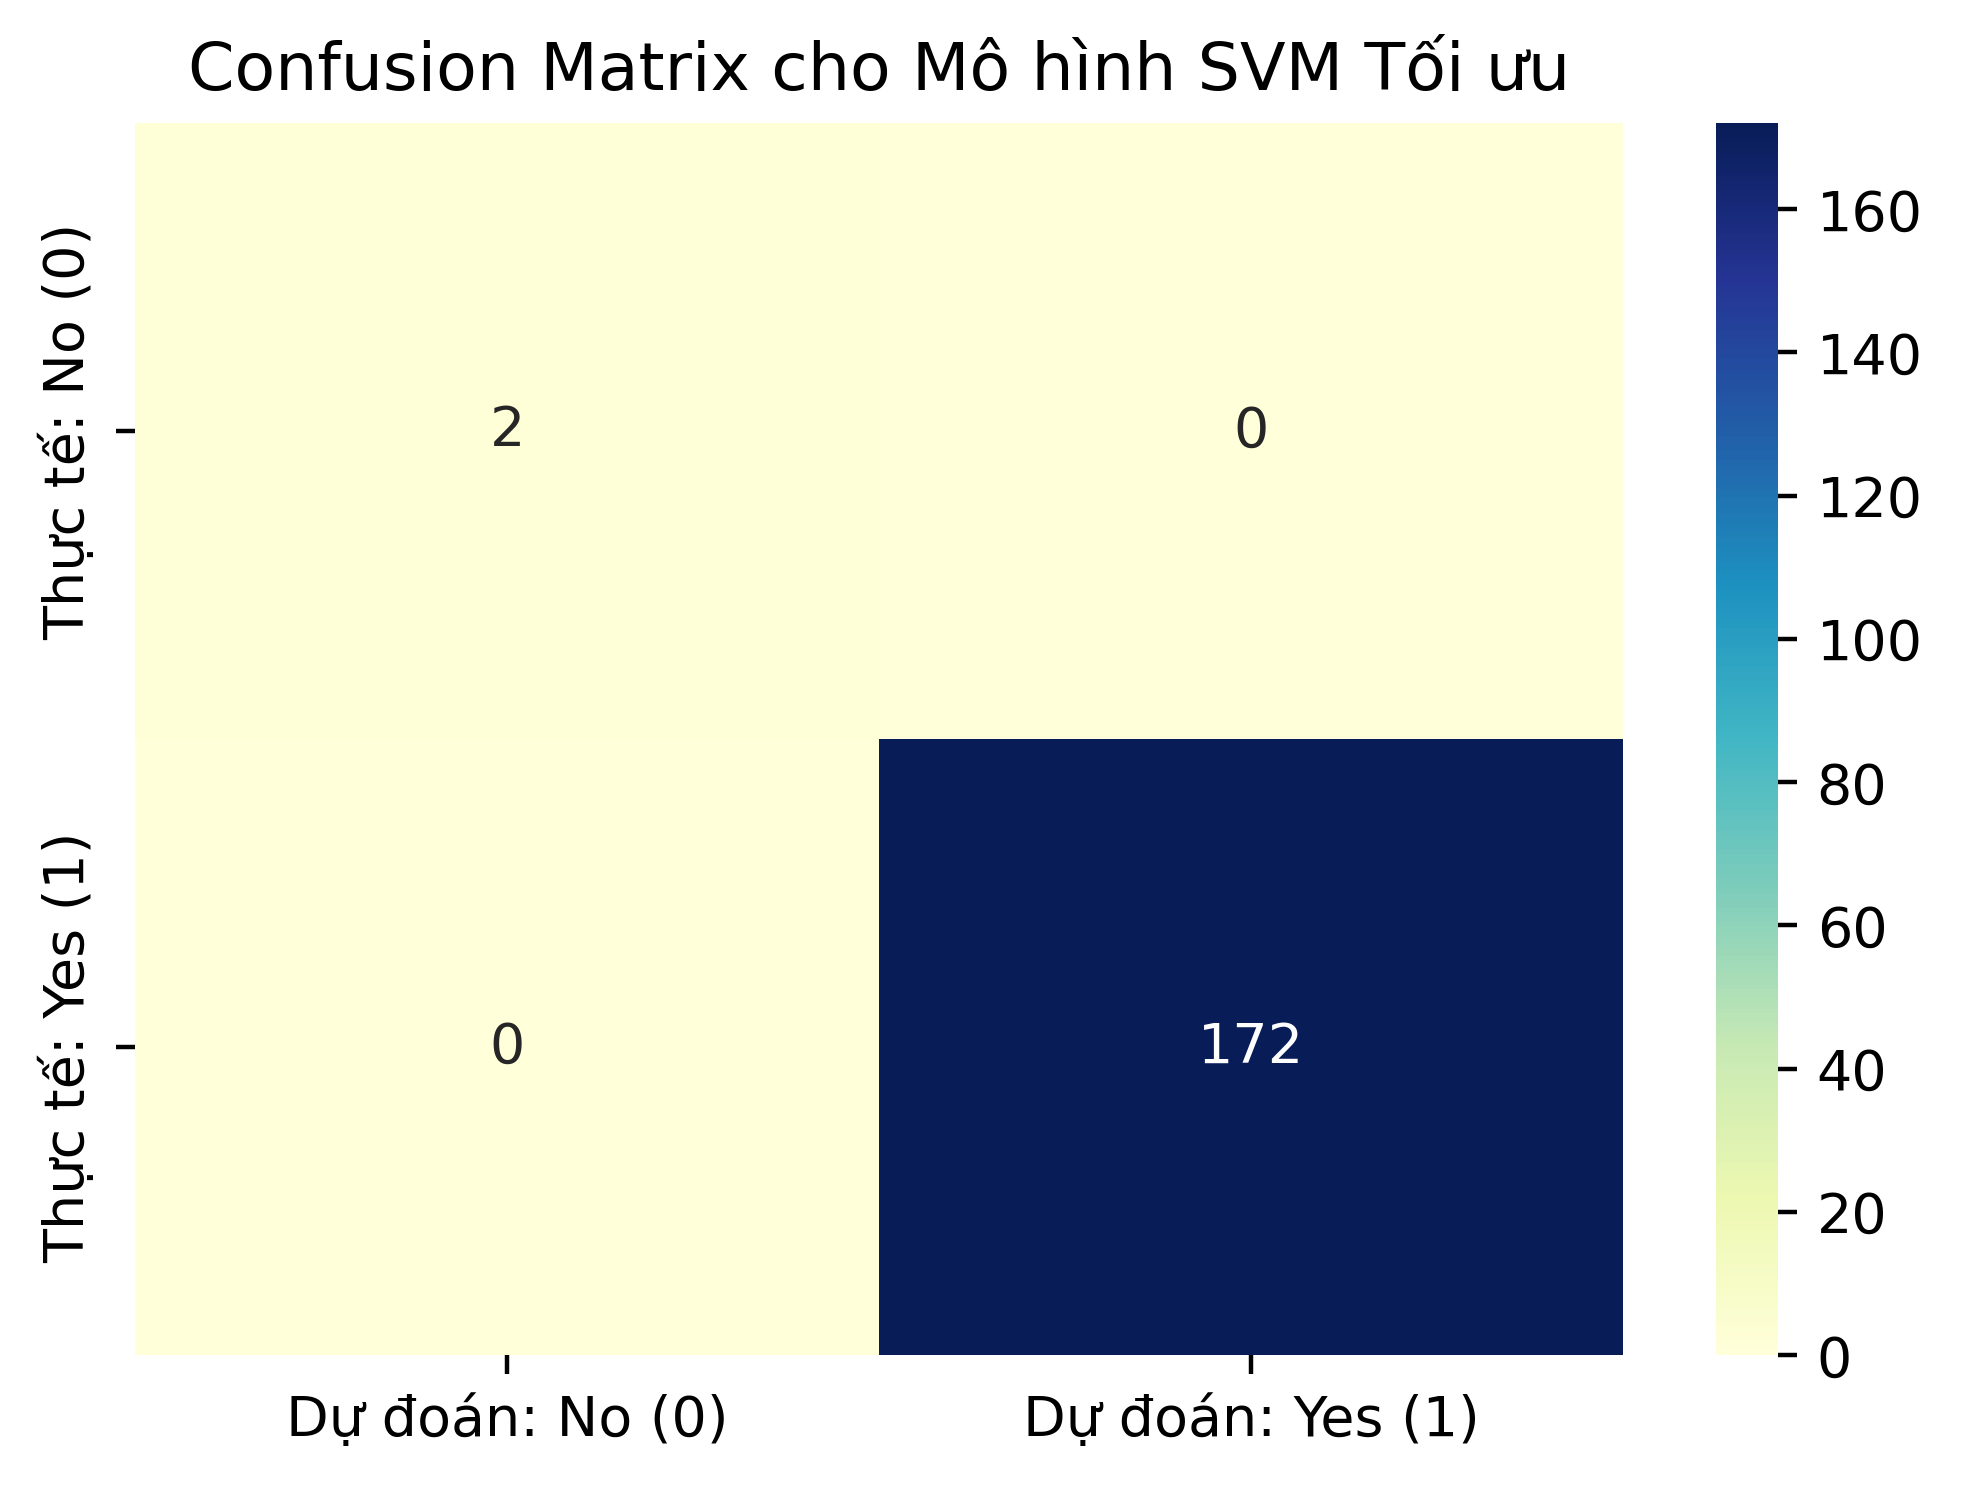

In [39]:
# Tạo Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Vẽ ma trận dưới dạng heatmap
print("\n--- Confusion Matrix ---")
plt.figure(figsize = (6,4))
sns.heatmap(cm, 
            annot=True, # Hiển thị số lượng
            fmt='d',    # Định dạng số nguyên
            cmap="YlGnBu", 
            xticklabels=['Dự đoán: No (0)', 'Dự đoán: Yes (1)'],
            yticklabels=['Thực tế: No (0)', 'Thực tế: Yes (1)'])
plt.title('Confusion Matrix cho Mô hình SVM Tối ưu')
plt.show()

**Nhận xét:**

1. Phân tích Lớp Thiểu số (Lớp 0: "No - Không Nguy hiểm")  

    - 	True Negatives (TN) = 2: Trong tập test có 2 ca "Không Nguy hiểm", mô hình đã dự đoán đúng cả 2.  

    -	False Positives (FP) = 0: Mô hình không hề báo động nhầm (không dự đoán nhầm bất kỳ ca "No" nào thành "Yes").  

    -	Recall (Độ phủ) Lớp 0: $2 / (2 + 0) = 100\%$. Mô hình đã "tóm" được 100% lớp thiểu số.  

2. Phân tích Lớp Đa số (Lớp 1: "Yes - Nguy hiểm")  

    -	True Positives (TP) = 172: Trong tập test có 172 ca "Nguy hiểm", mô hình đã dự đoán đúng cả 172.  

    -	False Negatives (FN) = 0: Mô hình không hề bỏ sót bất kỳ trường hợp nguy hiểm nào (không dự đoán nhầm bất kỳ ca "Yes" nào thành "No").  
    
    -	Recall (Độ phủ) Lớp 1: $172 / (172 + 0) = 100\%$. Mô hình đã "tóm" được 100% lớp đa số.

